# Presence of Heart Disease 

Data below is from a Cleveland database with information connected to the presence of heart disease in a patient. The dataset holds 14 attributes including: age, sex, 'cp' or chest pain, 'trestbps' resting blood sugar in mm/Hg upon admission to the hospital, 'chol' serum cholestrol in mg/dl, 'fbs' fasting blood sugar > 120 mg/dl 1 = True, 0 = False, and more characteristics. There are approximately 303 rows, which each represent a different patient. 

I am interested in examining three questions about the dataset:

**I. Do different genders experience different chest pains? Is there a relationship between gender and 'cp'? i.e. whether females or males experience different levels.**

**II. Is there a relationship between cholestrol levels and 'trestbps' resting blood pressure upon admission to hospital?**

**III. Is there a relationship bettween age and cholestrol? What are the top three cholestrol values?**


_Source information:_

_This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).((The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.))_






In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("heart.csv")

Below we can see the main attributes of the dataset from age, sex, cp, .... to target.

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

In this dataset, we can see that there are 303 rows across 14 columns. Columns exhibit both numerical and categorical data including both resting beats per second, cholestrol levels, and gender. 

In [21]:
df.shape

(303, 14)

In this section, I will look at the first question:

**I. Do different genders experience different chest pains? Is there a relationship between gender and 'cp'? i.e. whether females or males experience different levels.**

I find that in terms of the greatest chest pain, the gender that experiences that them ost is male. 

In [22]:
df['cp'].nlargest(5)

0     3
13    3
14    3
17    3
19    3
Name: cp, dtype: int64

In [91]:
df['cp'].mean()

#Patients have a level of chest pain that is centered around a mean of 1 on a scale of 0 to 3
np.percentile(df.cp, 50)

#The median is equal to and consistent to the mean of chest pain

1.0

In [23]:
#Here we are segmenting the data by the highest chest pains

levelthree_cp = df[df['cp'] == 3]

print(levelthree_cp)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
13    64    1   3       110   211    0        0      144      1      1.8   
14    58    0   3       150   283    1        0      162      0      1.0   
17    66    0   3       150   226    0        1      114      0      2.6   
19    69    0   3       140   239    0        1      151      0      1.8   
24    40    1   3       140   199    0        1      178      1      1.4   
34    51    1   3       125   213    0        0      125      1      1.4   
58    34    1   3       118   182    0        0      174      0      0.0   
62    52    1   3       118   186    0        0      190      0      0.0   
83    52    1   3       152   298    1        1      178      0      1.2   
100   42    1   3       148   244    0        0      178      0      0.8   
101   59    1   3       178   270    0        0      145      0      4.2   
106   69    

In [41]:
#Out of the top chest pains, how many are diagnosed to each gender?

print(levelthree_cp['sex'])


levelthree_cp = levelthree_cp[['sex']] 
#With this, we see that there may be a relationship between chest pain and gender. Four out of the n chest pain level = 3 patients are female, while the rest are male


print(len(levelthree_cp))

#There are 23 patients with highest chest pain out of 303 total patients, out of those 4 are female and 19 are male. 

0      1
13     1
14     0
17     0
19     0
24     1
34     1
58     1
62     1
83     1
100    1
101    1
106    1
117    1
147    0
152    1
222    1
228    1
254    1
259    1
271    1
286    1
299    1
Name: sex, dtype: int64
23


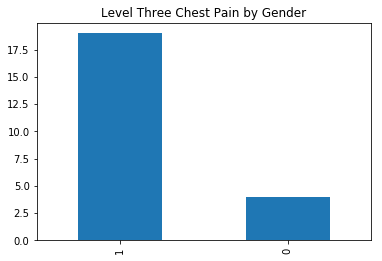

In [47]:
levelthree_cp['sex'].value_counts().plot(kind= 'bar', y= 'trips', x= 'sex', title= 'Level Three Chest Pain by Gender')


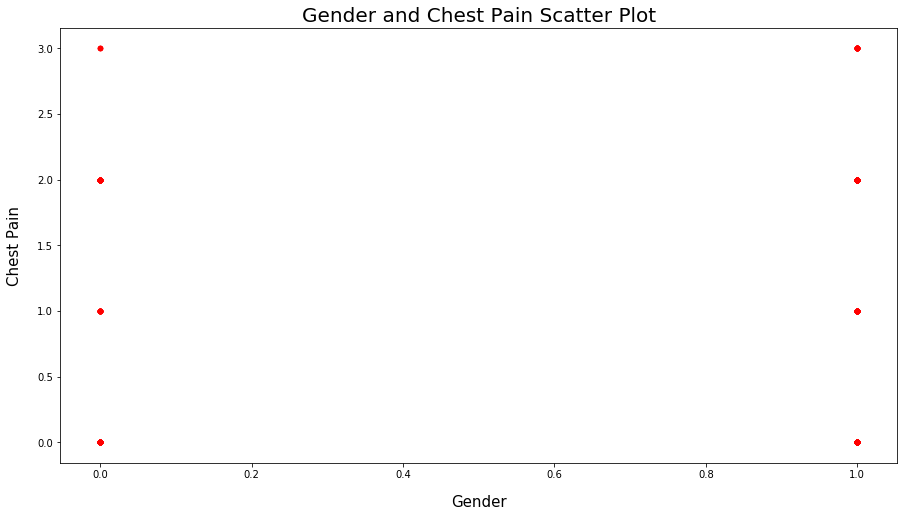

In [55]:
allchestpain = df[['cp', 'sex']]

allchestpain.plot(kind='scatter', x='sex', y= 'cp', figsize=(15,8),  color=('r'))
plt.xlabel("Gender", labelpad=15, fontsize = 15)
plt.ylabel("Chest Pain", labelpad=15, fontsize = 15)
plt.title("Gender and Chest Pain Scatter Plot", fontsize = 20)
plt.show()

In [84]:
allchestpainf = allchestpain[allchestpain['sex'] == 1]

allchestpainf.groupby('cp').sum()

print(allchestpainf.groupby('cp').sum())

print(allchestpainf)

    sex
cp     
0   104
1    32
2    52
3    19
     cp  sex
0     3    1
1     2    1
3     1    1
5     0    1
7     1    1
8     2    1
9     2    1
10    0    1
12    1    1
13    3    1
18    0    1
20    0    1
21    2    1
22    0    1
23    2    1
24    3    1
26    2    1
27    2    1
29    2    1
31    0    1
32    1    1
33    2    1
34    3    1
37    2    1
41    1    1
42    0    1
44    2    1
45    1    1
46    2    1
47    2    1
..   ..  ...
267   2    1
268   0    1
269   0    1
270   0    1
271   3    1
272   0    1
273   0    1
274   0    1
275   0    1
276   0    1
277   1    1
279   0    1
280   0    1
281   0    1
282   2    1
283   0    1
284   0    1
285   0    1
286   3    1
287   1    1
288   0    1
290   0    1
291   0    1
293   2    1
294   0    1
295   0    1
297   0    1
299   3    1
300   0    1
301   0    1

[207 rows x 2 columns]


In [88]:
#allchestpainf.groupby('cp').sum().plot(kind='bar', x ='cp', y='sex', figsize=(15,8),  color=('r'))
#plt.xlabel("Gender", labelpad=15, fontsize = 15)
#plt.ylabel("Chest Pain", labelpad=15, fontsize = 15)
#plt.title("Gender and Chest Pain Scatter Plot", fontsize = 20)
#plt.show()

In this section, I will look at the second question:

**II. Is there a relationship between cholestrol levels and 'trestbps' resting blood pressure upon admission to the hospital?**

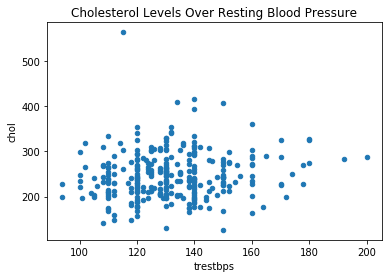

In [97]:
df.plot(kind= 'scatter', y= 'chol', x= 'trestbps', title= 'Cholesterol Levels Over Resting Blood Pressure')

In [98]:
#determine correlation so we may know more information about this relationship

data = df[['chol', 'trestbps']]

data.corr(method='pearson')

#Here we can see that there is a weak, but positive relationship between serum cholestrol levels and resting blood pressure amongst admission to the hospital

,chol,trestbps
chol,1.000000,0.123174
trestbps,0.123174,1.000000


In this section, I will look at the final question:

**III. Is there a relationship bettween age and cholestrol? What are the top three cholestrol values?**

In [100]:
df['chol'].nlargest(3)

#These are the top three cholestrol levels

85     564
28     417
246    409
Name: chol, dtype: int64

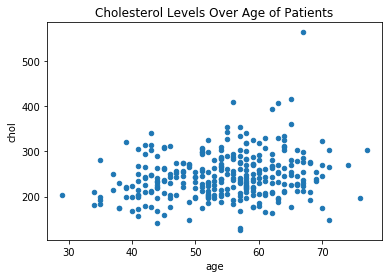

In [102]:
df.plot(kind= 'scatter', y= 'chol', x= 'age', title= 'Cholesterol Levels Over Age of Patients')

In [105]:
data1 = df[['chol', 'age']]

In [107]:
data1.corr(method='pearson')

#Here we can see that there is a weak, but positive relationship between serum cholestrol levels and age of patients

#This correlation is slightly higher than that of trestbps and cholestrol but still is not significant

,chol,age
chol,1.000000,0.213678
age,0.213678,1.000000
